In [98]:
import pandas as pd
df = pd.read_excel('Dataset (2).xlsx')


In [99]:
# Filter out 'unknown' race instances
df = df[~df['Race'].isin(['Unknown'])]
del df['Gender']
print(df)

                     Age       Race  CatsInHouse  \
0       Less than 1 year     Birman            3   
1       Less than 1 year     Birman            1   
2             2-10 years   European            4   
3       Less than 1 year   European            1   
4              1-2 years     Birman            2   
...                  ...        ...          ...   
3138          2-10 years    Persian            1   
3139    Less than 1 year  MaineCoon            3   
3140  More than 10 years      Other            1   
3141    Less than 1 year     Bengal            1   
3142    Less than 1 year     Bengal            5   

                            HousingType       Zone  TimeOutside  \
0             Apartment without balcony      Urban            0   
1     Apartment with balcony or terrace      Urban            0   
2                House in a subdivision      Urban            0   
3                House in a subdivision      Rural            2   
4                 Individual house zone 

In [100]:
# Calculate the mean of numeric values
numeric_mask = df['NaturalAreasAbundance'] != 'Unknown'
mean_value = pd.to_numeric(df[numeric_mask]['NaturalAreasAbundance']).mean()

# Replace 'Unknown' with the mean value and round to nearest integer
df['NaturalAreasAbundance'] = df['NaturalAreasAbundance'].replace('Unknown', mean_value)
df['NaturalAreasAbundance'] = df['NaturalAreasAbundance'].astype(float).round().astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 0 to 3142
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    3063 non-null   object
 1   Race                   3063 non-null   object
 2   CatsInHouse            3063 non-null   int64 
 3   HousingType            3063 non-null   object
 4   Zone                   3063 non-null   object
 5   TimeOutside            3063 non-null   int64 
 6   TimeWithOwner          3063 non-null   int64 
 7   Shy                    3063 non-null   int64 
 8   Calm                   3063 non-null   int64 
 9   Skittish               3063 non-null   int64 
 10  Intelligent            3063 non-null   int64 
 11  Vigilant               3063 non-null   int64 
 12  Tenacious              3063 non-null   int64 
 13  Affectionate           3063 non-null   int64 
 14  Friendly               3063 non-null   int64 
 15  Loner                  306

In [101]:
import pandas as pd

def transform_dataset(df):
    """
    Transform the dataset by:
    1. Mapping age values to numeric
    2. One-hot encoding HousingType, Zone, and Race
    
    Args:
    df (pandas.DataFrame): Input DataFrame
    
    Returns:
    pandas.DataFrame: Transformed DataFrame
    """
    # Create a copy of the DataFrame
    df_transformed = df.copy()
    
    # Age mapping
    age_mapping = {
        'Less than 1 year': 0.5,
        '1-2 years': 1.5,
        '2-10 years': 6,
        'More than 10 years': 12
    }
    
    # Apply age mapping
    df_transformed['Age'] = df_transformed['Age'].map(age_mapping)
    
    # One-hot encode categorical variables
    categorical_columns = ['HousingType', 'Zone', 'Race']
    
    # Create one-hot encoded columns
    for column in categorical_columns:
        one_hot = pd.get_dummies(df_transformed[column], prefix=column)
        
        # Add one-hot encoded columns to the transformed DataFrame
        df_transformed = pd.concat([df_transformed, one_hot], axis=1)
        
        # Drop the original categorical column
        df_transformed = df_transformed.drop(column, axis=1)
    
    return df_transformed

# Example usage:
df = transform_dataset(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 0 to 3142
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            3063 non-null   float64
 1   CatsInHouse                                    3063 non-null   int64  
 2   TimeOutside                                    3063 non-null   int64  
 3   TimeWithOwner                                  3063 non-null   int64  
 4   Shy                                            3063 non-null   int64  
 5   Calm                                           3063 non-null   int64  
 6   Skittish                                       3063 non-null   int64  
 7   Intelligent                                    3063 non-null   int64  
 8   Vigilant                                       3063 non-null   int64  
 9   Tenacious                                      3063 non-n

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 0 to 3142
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            3063 non-null   float64
 1   CatsInHouse                                    3063 non-null   int64  
 2   TimeOutside                                    3063 non-null   int64  
 3   TimeWithOwner                                  3063 non-null   int64  
 4   Shy                                            3063 non-null   int64  
 5   Calm                                           3063 non-null   int64  
 6   Skittish                                       3063 non-null   int64  
 7   Intelligent                                    3063 non-null   int64  
 8   Vigilant                                       3063 non-null   int64  
 9   Tenacious                                      3063 non-n

In [103]:
import pandas as pd
import numpy as np

def remove_race_outliers(df, percentage=5):
    """
    Remove outliers for each cat race based on numerical columns.
    Shows distribution of races before and after outlier removal.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    percentage (float): Percentage of outliers to remove (default 5%)
    
    Returns:
    pandas.DataFrame: DataFrame with outliers removed
    """
    # Get list of race columns and numerical columns
    race_columns = [col for col in df.columns if col.startswith('Race_')]
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_cols = [col for col in numerical_cols if not col.startswith('Race_')]
    
    # Calculate initial race distribution
    print("\nInitial Race Distribution:")
    initial_dist = {}
    for race_col in race_columns:
        race_count = df[race_col].sum()
        race_pct = (race_count / len(df)) * 100
        initial_dist[race_col.replace('Race_', '')] = (race_count, race_pct)
        print(f"{race_col.replace('Race_', ''):15} {race_count:5d} cats ({race_pct:5.1f}%)")
    
    # Create mask for final filtering
    final_mask = pd.Series(True, index=df.index)
    
    for race_col in race_columns:
        # Get subset of data for this race
        race_mask = df[race_col]
        race_data = df[race_mask]
        
        if len(race_data) == 0:
            continue
            
        # Calculate outlier scores for each numerical column
        outlier_scores = pd.DataFrame()
        
        for col in numerical_cols:
            if race_data[col].nunique() > 1:  # Only process if there's variation
                Q1 = race_data[col].quantile(0.25)
                Q3 = race_data[col].quantile(0.75)
                IQR = Q3 - Q1
                
                # Calculate z-scores for more robust outlier detection
                z_scores = np.abs((race_data[col] - race_data[col].mean()) / race_data[col].std())
                outlier_scores[col] = z_scores
        
        if not outlier_scores.empty:
            # Calculate mean outlier score across all columns
            mean_outlier_score = outlier_scores.mean(axis=1)
            
            # Calculate threshold for given percentage
            threshold = mean_outlier_score.quantile(1 - percentage/100)
            
            # Update final mask
            race_indices = race_data.index[mean_outlier_score <= threshold]
            final_mask.loc[race_mask] = race_data.index.isin(race_indices)
    
    # Apply final mask to remove outliers
    cleaned_df = df[final_mask].copy()
    
    # Print summary of removed records
    removed_count = len(df) - len(cleaned_df)
    print(f"\nRemoved {removed_count} records ({(removed_count/len(df)*100):.1f}% of total)")
    
    # Calculate final race distribution
    print("\nFinal Race Distribution:")
    print("Race            Initial Count (%)    Final Count (%)    Change")
    print("-" * 65)
    for race_col in race_columns:
        race_name = race_col.replace('Race_', '')
        final_count = cleaned_df[race_col].sum()
        final_pct = (final_count / len(cleaned_df)) * 100
        initial_count, initial_pct = initial_dist[race_name]
        change_pct = final_pct - initial_pct
        print(f"{race_name:15} {initial_count:5d} ({initial_pct:5.1f}%)    {final_count:5d} ({final_pct:5.1f}%)    {change_pct:+5.1f}%")
    
    return cleaned_df

# Assuming your DataFrame is called 'df'
df = remove_race_outliers(df, percentage=5)


Initial Race Distribution:
Bengal            239 cats (  7.8%)
Birman            192 cats (  6.3%)
BritishShorthair   166 cats (  5.4%)
Chartreux          31 cats (  1.0%)
European         1022 cats ( 33.4%)
MaineCoon         198 cats (  6.5%)
NoBreed           483 cats ( 15.8%)
Other             135 cats (  4.4%)
Persian           192 cats (  6.3%)
Ragdoll           217 cats (  7.1%)
Savannah           26 cats (  0.8%)
Siamese            58 cats (  1.9%)
Sphynx             76 cats (  2.5%)
TurkishAngora      28 cats (  0.9%)

Removed 159 records (5.2% of total)

Final Race Distribution:
Race            Initial Count (%)    Final Count (%)    Change
-----------------------------------------------------------------
Bengal            239 (  7.8%)      227 (  7.8%)     +0.0%
Birman            192 (  6.3%)      182 (  6.3%)     -0.0%
BritishShorthair   166 (  5.4%)      157 (  5.4%)     -0.0%
Chartreux          31 (  1.0%)       29 (  1.0%)     -0.0%
European         1022 ( 33.4%)      97

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 1 to 3142
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            2904 non-null   float64
 1   CatsInHouse                                    2904 non-null   int64  
 2   TimeOutside                                    2904 non-null   int64  
 3   TimeWithOwner                                  2904 non-null   int64  
 4   Shy                                            2904 non-null   int64  
 5   Calm                                           2904 non-null   int64  
 6   Skittish                                       2904 non-null   int64  
 7   Intelligent                                    2904 non-null   int64  
 8   Vigilant                                       2904 non-null   int64  
 9   Tenacious                                      2904 non-n

In [105]:
# Removed most attributes which have low correlation with the target variable

del df['Predictable']
del df['Affectionate']
del df['Inattentive']
# del df['CatsInHouse']
# del df['TimeWithOwner']
# del df['Age']
# del df['HousingType_Apartment with balcony or terrace']
# del df['HousingType_Apartment without balcony']
# del df['HousingType_House in a subdivision']
# del df['HousingType_Individual house zone']
# del df['Zone_Periurban']
# del df['Zone_Rural']
# del df['Zone_Urban']
# del df['']
# del df['']


In [106]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

def balance_dataset_custom(df, race_counts_dict):
    """
    Balance the dataset according to custom counts for each race.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    race_counts_dict (dict): Dictionary with races as keys and desired counts as values
                            Example: {'European': 500, 'Sphynx': 100, ...}
    
    Returns:
    pandas.DataFrame: Balanced dataset with specified counts for each race
    """
    # Create an empty DataFrame to store the balanced data
    balanced_df = pd.DataFrame()
    
    # Get all race columns
    race_columns = [col for col in df.columns if col.startswith('Race_')]
    
    # Process each race
    for race in race_counts_dict.keys():
        race_col = f'Race_{race}'
        
        # Skip if race column doesn't exist
        if race_col not in df.columns:
            print(f"Warning: {race} not found in dataset. Skipping...")
            continue
            
        # Get samples for current race
        race_samples = df[df[race_col] == True]
        desired_count = race_counts_dict[race]
        current_count = len(race_samples)
        
        if desired_count == current_count:
            # If we want the same number of samples, just add them
            balanced_df = pd.concat([balanced_df, race_samples])
        
        elif desired_count < current_count:
            # If we want fewer samples, randomly select without replacement
            sampled = race_samples.sample(n=desired_count, random_state=42)
            balanced_df = pd.concat([balanced_df, sampled])
            
        else:
            # If we want more samples, use oversampling
            resampled = resample(race_samples,
                               replace=True,
                               n_samples=desired_count,
                               random_state=42)
            balanced_df = pd.concat([balanced_df, resampled])
    
    # Reset index
    balanced_df = balanced_df.reset_index(drop=True)
    
    # Print summary of new race distribution
    print("\nNew race distribution:")
    for race in race_counts_dict.keys():
        race_col = f'Race_{race}'
        if race_col in balanced_df.columns:
            count = sum(balanced_df[race_col])
            print(f"{race}: {count}")
            
    return balanced_df

# Example usage:
# Define your desired counts for each race
desired_counts = {
    'European': 800,
    'NoBreed': 600,
    'Bengal': 500,
    'Ragdoll': 400,
    'MaineCoon': 350,
    'Birman': 300,
    'Persian': 300,
    'BritishShorthair': 300,
    'Other': 300,
    'Sphynx': 150,
    'Siamese': 100,
    'Chartreux': 60,
    'TurkishAngora': 60,
    'Savannah': 50
}

# Balance the dataset
df = balance_dataset_custom(df, desired_counts)


New race distribution:
European: 800
NoBreed: 600
Bengal: 500
Ragdoll: 400
MaineCoon: 350
Birman: 300
Persian: 300
BritishShorthair: 300
Other: 300
Sphynx: 150
Siamese: 100
Chartreux: 60
TurkishAngora: 60
Savannah: 50


In [107]:
import pandas as pd
import numpy as np

def add_breed_specific_traits(df):
    """
    Add breed-specific traits to the cat dataset with probabilistic assignment:
    - FlatFace: True for Persian cats
    - LimpWhenHeld: 90% True for Ragdoll, 10% True for others
    - Hairless: True for Sphynx cats
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with Race_ columns
    
    Returns:
    pandas.DataFrame: DataFrame with new trait columns added
    """
    # Create a copy to avoid modifying the original DataFrame
    df_new = df.copy()
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Add FlatFace attribute (True for Persian cats)
    df_new['FlatFace'] = df_new['Race_Persian']
    
    # Add LimpWhenHeld attribute with probabilities
    ragdoll_mask = df_new['Race_Ragdoll']
    
    # Generate random values for Ragdolls (90% True)
    ragdoll_values = np.random.choice([True, False], 
                                    size=sum(ragdoll_mask), 
                                    p=[0.9, 0.1])
    
    # Generate random values for non-Ragdolls (10% True)
    non_ragdoll_values = np.random.choice([True, False], 
                                        size=sum(~ragdoll_mask), 
                                        p=[0.1, 0.9])
    
    # Combine the values
    df_new['LimpWhenHeld'] = False  # Initialize all to False
    df_new.loc[ragdoll_mask, 'LimpWhenHeld'] = ragdoll_values
    df_new.loc[~ragdoll_mask, 'LimpWhenHeld'] = non_ragdoll_values
    
    # Add Hairless attribute (True for Sphynx cats)
    df_new['Hairless'] = df_new['Race_Sphynx']
    
    return df_new

# Assuming your DataFrame is called 'df'
df = add_breed_specific_traits(df)

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def create_single_race_column(df):
    """
    Convert one-hot encoded race columns into a single categorical column.
    Returns the race column and the original dataframe.
    """
    # Get all race column names
    race_columns = [col for col in df.columns if col.startswith('Race_')]
    
    # Create a single race column
    race_series = pd.Series('Unknown', index=df.index)
    for col in race_columns:
        # For each True value, set the race name (removing 'Race_' prefix)
        race_series[df[col]] = col.replace('Race_', '')
    
    return race_series

def split_cat_dataset(df, test_size=0.1, random_state=42):
    """
    Perform stratified split on the cat dataset based on races.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing cat data
    test_size : float
        Proportion of the dataset to include in the test split
    random_state : int
        Random state for reproducibility
    
    Returns:
    --------
    train_df, test_df : tuple of pandas.DataFrame
        The split datasets
    """
    # Create single race column for stratification
    race_column = create_single_race_column(df)
    
    # Perform stratified split
    train_idx, test_idx = train_test_split(
        np.arange(len(df)),
        test_size=test_size,
        random_state=random_state,
        stratify=race_column
    )
    
    # Split the dataframe
    train_df = df.iloc[train_idx].copy()
    test_df = df.iloc[test_idx].copy()
    
    # Print split information
    print(f"Training set size: {len(train_df)} ({(1-test_size)*100:.1f}%)")
    print(f"Test set size: {len(test_df)} ({test_size*100:.1f}%)")
    
    # Verify stratification
    print("\nRace distribution in original dataset:")
    original_dist = race_column.value_counts(normalize=True)
    print(original_dist)
    
    print("\nRace distribution in training set:")
    train_dist = create_single_race_column(train_df).value_counts(normalize=True)
    print(train_dist)
    
    print("\nRace distribution in test set:")
    test_dist = create_single_race_column(test_df).value_counts(normalize=True)
    print(test_dist)
    
    return train_df, test_df

# Split the dataset
df, test_df = split_cat_dataset(df, test_size=0.1, random_state=42)

Training set size: 3843 (90.0%)
Test set size: 427 (10.0%)

Race distribution in original dataset:
European            0.187354
NoBreed             0.140515
Bengal              0.117096
Ragdoll             0.093677
MaineCoon           0.081967
Birman              0.070258
Persian             0.070258
BritishShorthair    0.070258
Other               0.070258
Sphynx              0.035129
Siamese             0.023419
Chartreux           0.014052
TurkishAngora       0.014052
Savannah            0.011710
Name: proportion, dtype: float64

Race distribution in training set:
European            0.187354
NoBreed             0.140515
Bengal              0.117096
Ragdoll             0.093677
MaineCoon           0.081967
BritishShorthair    0.070258
Other               0.070258
Birman              0.070258
Persian             0.070258
Sphynx              0.035129
Siamese             0.023419
TurkishAngora       0.014052
Chartreux           0.014052
Savannah            0.011710
Name: proportion, dt

In [109]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3843 entries, 1930 to 1678
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            3843 non-null   float64
 1   CatsInHouse                                    3843 non-null   int64  
 2   TimeOutside                                    3843 non-null   int64  
 3   TimeWithOwner                                  3843 non-null   int64  
 4   Shy                                            3843 non-null   int64  
 5   Calm                                           3843 non-null   int64  
 6   Skittish                                       3843 non-null   int64  
 7   Intelligent                                    3843 non-null   int64  
 8   Vigilant                                       3843 non-null   int64  
 9   Tenacious                                      3843 no

In [110]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# 
# # Define a distinct color palette for cat breeds
# DISTINCT_COLORS = {
#     'Bengal': '#FF0000',         # Red
#     'Birman': '#00FF00',         # Green
#     'BritishShorthair': '#0000FF', # Blue
#     'Chartreux': '#FFA500',      # Orange
#     'European': '#800080',       # Purple
#     'MaineCoon': '#FFD700',      # Gold
#     'NoBreed': '#4B0082',        # Indigo
#     'Other': '#808080',          # Gray
#     'Persian': '#FF1493',        # Deep Pink
#     'Ragdoll': '#00FFFF',        # Cyan
#     'Savannah': '#FF4500',       # Orange Red
#     'Siamese': '#9400D3',        # Violet
#     'Sphynx': '#32CD32',         # Lime Green
#     'TurkishAngora': '#FF8C00'   # Dark Orange
# }
# 
# # Function to prepare the data
# def prepare_data(df):
#     # Separate features and target
#     # Exclude all Race_ columns as they are our target
#     feature_cols = [col for col in df.columns if not col.startswith('Race_')]
#     X = df[feature_cols]
# 
#     # Create target column (single label for each cat)
#     race_cols = [col for col in df.columns if col.startswith('Race_')]
#     y = df[race_cols].idxmax(axis=1).str.replace('Race_', '')
# 
#     # Scale the features
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
# 
#     return X_scaled, y
# 
# # Function to create PCA visualization
# def create_pca_plots(X_scaled, y):
#     # 2D PCA
#     pca_2d = PCA(n_components=2)
#     X_pca_2d = pca_2d.fit_transform(X_scaled)
# 
#     # 3D PCA
#     pca_3d = PCA(n_components=3)
#     X_pca_3d = pca_3d.fit_transform(X_scaled)
# 
#     # Calculate explained variance ratios
#     var_ratio_2d = pca_2d.explained_variance_ratio_
#     var_ratio_3d = pca_3d.explained_variance_ratio_
# 
#     # Create subplot with 2D and 3D PCA
#     fig = make_subplots(
#         rows=1, cols=2,
#         specs=[[{'type': 'xy'}, {'type': 'scene'}]],
#         subplot_titles=(
#             f'2D PCA (Variance explained: {var_ratio_2d[0]:.1%}, {var_ratio_2d[1]:.1%})',
#             f'3D PCA (Variance explained: {var_ratio_3d[0]:.1%}, {var_ratio_3d[1]:.1%}, {var_ratio_3d[2]:.1%})'
#         )
#     )
# 
#     # Create color array
#     colors = [DISTINCT_COLORS[breed] for breed in y]
# 
#     # 2D PCA plot
#     for breed in DISTINCT_COLORS.keys():
#         mask = y == breed
#         if np.any(mask):
#             fig.add_trace(
#                 go.Scatter(
#                     x=X_pca_2d[mask, 0],
#                     y=X_pca_2d[mask, 1],
#                     mode='markers',
#                     marker=dict(size=8, color=DISTINCT_COLORS[breed]),
#                     name=breed,
#                     text=y[mask],
#                     showlegend=True
#                 ),
#                 row=1, col=1
#             )
# 
#     # 3D PCA plot
#     for breed in DISTINCT_COLORS.keys():
#         mask = y == breed
#         if np.any(mask):
#             fig.add_trace(
#                 go.Scatter3d(
#                     x=X_pca_3d[mask, 0],
#                     y=X_pca_3d[mask, 1],
#                     z=X_pca_3d[mask, 2],
#                     mode='markers',
#                     marker=dict(size=4, color=DISTINCT_COLORS[breed]),
#                     name=breed,
#                     text=y[mask],
#                     showlegend=False
#                 ),
#                 row=1, col=2
#             )
# 
#     # Update layout
#     fig.update_layout(
#         title='PCA Visualization of Cat Breeds',
#         height=700,
#         width=1400,
#         legend=dict(
#             itemsizing='constant',
#             title=dict(text='Cat Breeds'),
#             bgcolor='rgba(255, 255, 255, 0.8)'
#         ),
#         template='plotly_white'
#     )
# 
#     return fig
# 
# # Function to create t-SNE visualization
# def create_tsne_plots(X_scaled, y):
#     # 2D t-SNE
#     tsne_2d = TSNE(n_components=2, random_state=42)
#     X_tsne_2d = tsne_2d.fit_transform(X_scaled)
# 
#     # 3D t-SNE
#     tsne_3d = TSNE(n_components=3, random_state=42)
#     X_tsne_3d = tsne_3d.fit_transform(X_scaled)
# 
#     # Create subplot with 2D and 3D t-SNE
#     fig = make_subplots(
#         rows=1, cols=2,
#         specs=[[{'type': 'xy'}, {'type': 'scene'}]],
#         subplot_titles=('2D t-SNE', '3D t-SNE')
#     )
# 
#     # 2D t-SNE plot
#     for breed in DISTINCT_COLORS.keys():
#         mask = y == breed
#         if np.any(mask):
#             fig.add_trace(
#                 go.Scatter(
#                     x=X_tsne_2d[mask, 0],
#                     y=X_tsne_2d[mask, 1],
#                     mode='markers',
#                     marker=dict(size=8, color=DISTINCT_COLORS[breed]),
#                     name=breed,
#                     text=y[mask],
#                     showlegend=True
#                 ),
#                 row=1, col=1
#             )
# 
#     # 3D t-SNE plot
#     for breed in DISTINCT_COLORS.keys():
#         mask = y == breed
#         if np.any(mask):
#             fig.add_trace(
#                 go.Scatter3d(
#                     x=X_tsne_3d[mask, 0],
#                     y=X_tsne_3d[mask, 1],
#                     z=X_tsne_3d[mask, 2],
#                     mode='markers',
#                     marker=dict(size=4, color=DISTINCT_COLORS[breed]),
#                     name=breed,
#                     text=y[mask],
#                     showlegend=False
#                 ),
#                 row=1, col=2
#             )
# 
#     # Update layout
#     fig.update_layout(
#         title='t-SNE Visualization of Cat Breeds',
#         height=700,
#         width=1400,
#         legend=dict(
#             itemsizing='constant',
#             title=dict(text='Cat Breeds'),
#             bgcolor='rgba(255, 255, 255, 0.8)'
#         ),
#         template='plotly_white'
#     )
# 
#     return fig
# 
# # Main execution
# def visualize_cat_data(df):
#     # Prepare the data
#     X_scaled, y = prepare_data(df)
# 
#     # Create PCA plots
#     pca_fig = create_pca_plots(X_scaled, y)
# 
#     # Create t-SNE plots
#     tsne_fig = create_tsne_plots(X_scaled, y)
# 
#     return pca_fig, tsne_fig
# 
# # Example usage:
# pca_fig, tsne_fig = visualize_cat_data(df)
# pca_fig.show()
# tsne_fig.show()



Fold 1/6
Epoch 5/1000
Train Loss: 2.1277, Train Acc: 0.3147
Val Loss: 2.0639, Val Acc: 0.3307
Epoch 10/1000
Train Loss: 1.9303, Train Acc: 0.3605
Val Loss: 1.9047, Val Acc: 0.3479
Epoch 15/1000
Train Loss: 1.7987, Train Acc: 0.3942
Val Loss: 1.8374, Val Acc: 0.3760
Epoch 20/1000
Train Loss: 1.7348, Train Acc: 0.4084
Val Loss: 1.8001, Val Acc: 0.3713
Epoch 25/1000
Train Loss: 1.6890, Train Acc: 0.4273
Val Loss: 1.7718, Val Acc: 0.3869
Epoch 30/1000
Train Loss: 1.6675, Train Acc: 0.4335
Val Loss: 1.7518, Val Acc: 0.3838
Epoch 35/1000
Train Loss: 1.6296, Train Acc: 0.4369
Val Loss: 1.7346, Val Acc: 0.3916
Epoch 40/1000
Train Loss: 1.6146, Train Acc: 0.4363
Val Loss: 1.7196, Val Acc: 0.3931
Epoch 45/1000
Train Loss: 1.5691, Train Acc: 0.4629
Val Loss: 1.7060, Val Acc: 0.4041
Epoch 50/1000
Train Loss: 1.5610, Train Acc: 0.4684
Val Loss: 1.6972, Val Acc: 0.4056
Epoch 55/1000
Train Loss: 1.5425, Train Acc: 0.4731
Val Loss: 1.6872, Val Acc: 0.4103
Epoch 60/1000
Train Loss: 1.5355, Train Acc: 

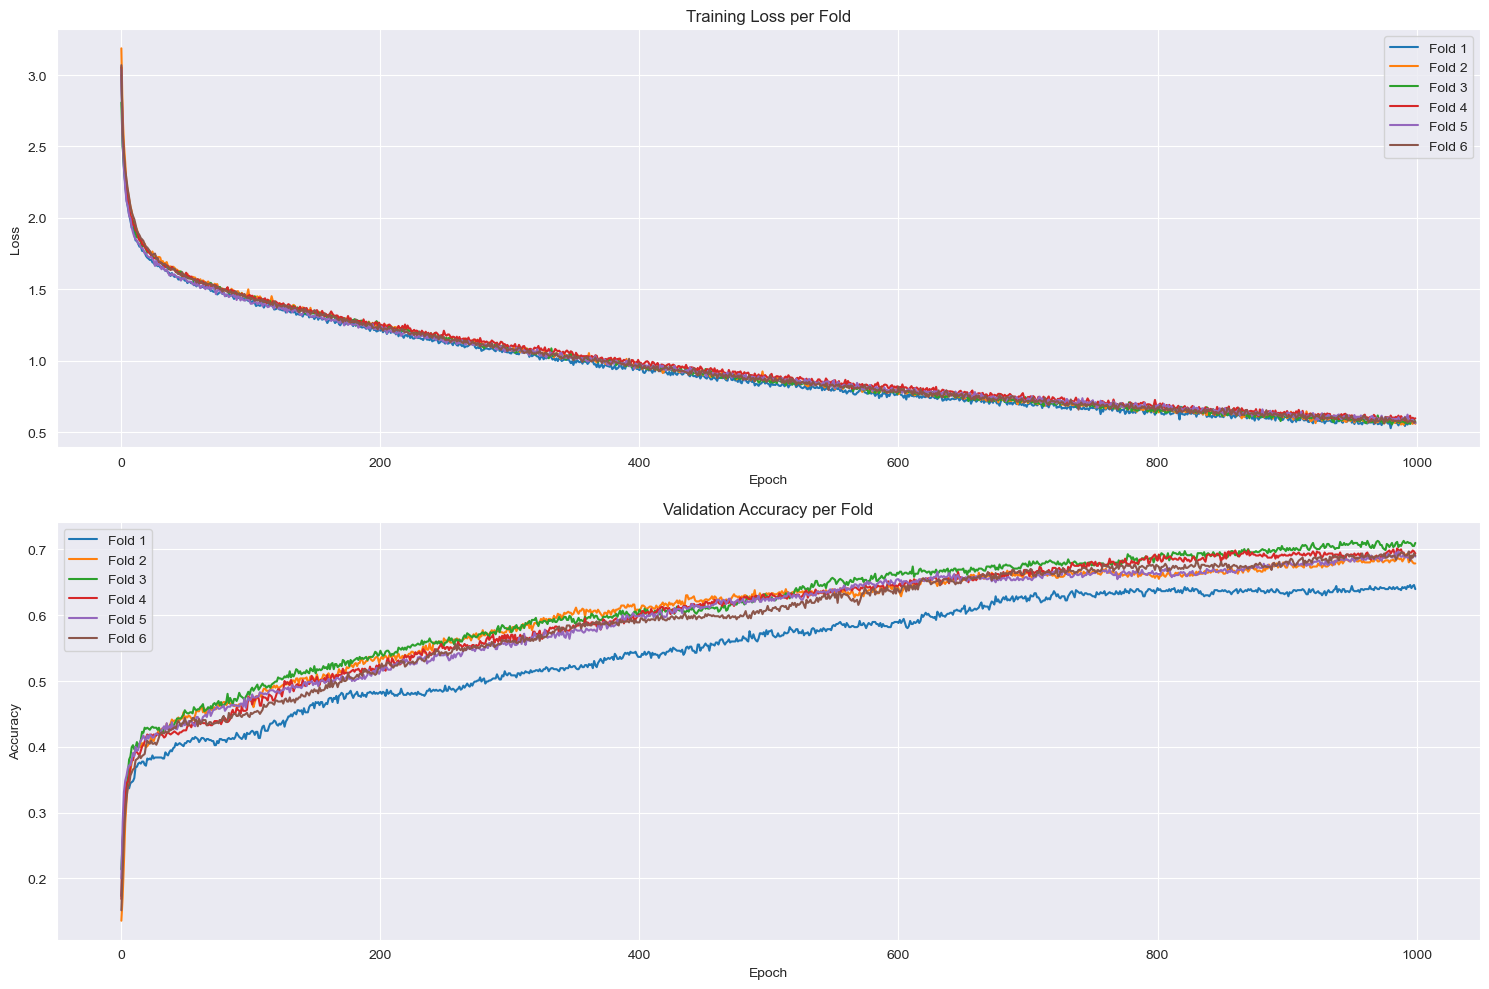

In [111]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import copy

class Dropout:
    def __init__(self, dropout_rate):
        self.dropout_rate = dropout_rate
        self.mask = None
        
    def forward(self, input_data, training=True):
        if training:
            self.mask = np.random.binomial(1, 1 - self.dropout_rate, input_data.shape) / (1 - self.dropout_rate)
            return input_data * self.mask
        return input_data
    
    def backward(self, grad_output):
        return grad_output * self.mask

class Layer:
    def __init__(self, input_size, output_size, activation='relu', l2_lambda=0.005, dropout_rate=0.2):
        self.weights = np.random.randn(input_size, output_size) * np.sqrt(2.0/input_size)
        self.bias = np.zeros((1, output_size))
        self.activation = activation
        self.l2_lambda = l2_lambda
        self.dropout = Dropout(dropout_rate)
        self.input = None
        self.output = None
        self.z = None
    
    def get_weights(self):
        return {
            'weights': self.weights.copy(),
            'bias': self.bias.copy()
        }
    
    def set_weights(self, weights):
        self.weights = weights['weights'].copy()
        self.bias = weights['bias'].copy()
        
    def forward(self, input_data, training=True):
        self.input = input_data
        self.z = np.dot(input_data, self.weights) + self.bias
        
        if self.activation == 'relu':
            self.output = np.maximum(0, self.z)
        elif self.activation == 'softmax':
            exp_values = np.exp(self.z - np.max(self.z, axis=1, keepdims=True))
            self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        if self.activation != 'softmax':
            self.output = self.dropout.forward(self.output, training)
            
        return self.output
    
    def backward(self, grad_output, learning_rate):
        if self.activation != 'softmax':
            grad_output = self.dropout.backward(grad_output)
        
        if self.activation == 'relu':
            grad_z = grad_output * (self.z > 0)
        elif self.activation == 'softmax':
            grad_z = grad_output
            
        grad_weights = np.dot(self.input.T, grad_z) + self.l2_lambda * self.weights
        grad_bias = np.sum(grad_z, axis=0, keepdims=True)
        grad_input = np.dot(grad_z, self.weights.T)
        
        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias
        
        return grad_input

class NeuralNetwork:
    def __init__(self, input_dim, output_dim, l2_lambda=0.005):
        self.layers = [
            Layer(input_dim, 128, 'relu', l2_lambda, dropout_rate=0.1),
            Layer(128, 64, 'relu', l2_lambda, dropout_rate=0.1),
            Layer(64, output_dim, 'softmax', l2_lambda, dropout_rate=0.0)
        ]
    
    def get_weights(self):
        return [layer.get_weights() for layer in self.layers]
    
    def set_weights(self, weights):
        for layer, w in zip(self.layers, weights):
            layer.set_weights(w)
    
    def forward(self, X, training=True):
        current_output = X
        for layer in self.layers:
            current_output = layer.forward(current_output, training)
        return current_output
    
    def backward(self, X, y, learning_rate):
        grad_output = self.layers[-1].output - y
        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output, learning_rate)
    
    def train_step(self, X_batch, y_batch, learning_rate):
        predictions = self.forward(X_batch, training=True)
        self.backward(X_batch, y_batch, learning_rate)
        loss = self.compute_loss(predictions, y_batch)
        return loss, predictions
    
    def predict(self, X):
        return self.forward(X, training=False)
    
    def compute_loss(self, predictions, y_true):
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(predictions), axis=1))
    
    def compute_accuracy(self, predictions, y_true):
        return np.mean(np.argmax(predictions, axis=1) == np.argmax(y_true, axis=1))

def plot_training_history(histories, n_splits):
    plt.figure(figsize=(15, 10))
    
    # Plot training loss
    plt.subplot(2, 1, 1)
    for fold in range(n_splits):
        plt.plot(histories[fold]['train_loss'], label=f'Fold {fold+1}')
    plt.title('Training Loss per Fold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot validation accuracy
    plt.subplot(2, 1, 2)
    for fold in range(n_splits):
        plt.plot(histories[fold]['val_acc'], label=f'Fold {fold+1}')
    plt.title('Validation Accuracy per Fold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def train_and_evaluate_model(X, y, n_splits=6, epochs=1000, batch_size=32, learning_rate=0.0001):
    y_encoded = y.values
    scaler = StandardScaler()
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_results = []
    histories = []
    
    n_classes = y_encoded.shape[1]
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, np.argmax(y_encoded, axis=1)), 1):
        print(f"\nFold {fold}/{n_splits}")
        
        X_train, X_val = X.iloc[train_idx].values, X.iloc[val_idx].values
        y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        model = NeuralNetwork(X_train.shape[1], n_classes, 0.001)
        
        # Initialize history and best model tracking
        history = {
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': []
        }
        
        best_val_accuracy = 0
        best_weights = None
        best_epoch = 0
        
        for epoch in range(epochs):
            indices = np.random.permutation(len(X_train_scaled))
            X_train_shuffled = X_train_scaled[indices]
            y_train_shuffled = y_train[indices]
            
            epoch_train_loss = 0
            epoch_train_acc = 0
            n_batches = 0
            
            for i in range(0, len(X_train_scaled), batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
                
                loss, predictions = model.train_step(X_batch, y_batch, learning_rate)
                accuracy = model.compute_accuracy(predictions, y_batch)
                
                epoch_train_loss += loss
                epoch_train_acc += accuracy
                n_batches += 1
            
            # Compute average training metrics
            avg_train_loss = epoch_train_loss / n_batches
            avg_train_acc = epoch_train_acc / n_batches
            
            # Compute validation metrics
            val_predictions = model.predict(X_val_scaled)
            val_loss = model.compute_loss(val_predictions, y_val)
            val_accuracy = model.compute_accuracy(val_predictions, y_val)
            
            # Store metrics
            history['train_loss'].append(avg_train_loss)
            history['train_acc'].append(avg_train_acc)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_accuracy)
            
            # Save best model weights for this fold
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_weights = model.get_weights()
                best_epoch = epoch
            
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch + 1}/{epochs}")
                print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}")
                print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Restore best weights for this fold
        model.set_weights(best_weights)
        histories.append(history)
        
        # Save fold results
        fold_results.append({
            'fold': fold,
            'best_val_accuracy': best_val_accuracy,
            'best_epoch': best_epoch,
            'model': model
        })
        
        print(f"\nFold {fold} Best Results:")
        print(f"Best Epoch: {best_epoch}")
        print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
    
    # Find the best overall model
    best_fold = max(fold_results, key=lambda x: x['best_val_accuracy'])
    
    print("\nOverall Cross-validation results:")
    print(f"Mean validation accuracy: {np.mean([r['best_val_accuracy'] for r in fold_results]):.4f}")
    print(f"Standard deviation: {np.std([r['best_val_accuracy'] for r in fold_results]):.4f}")
    print(f"\nBest model from fold {best_fold['fold']} at epoch {best_fold['best_epoch']}")
    print(f"Best validation accuracy: {best_fold['best_val_accuracy']:.4f}")
    
    # Plot training history
    plot_training_history(histories, n_splits)
    
    return best_fold['model'], fold_results, histories

def prepare_data(data):
    race_columns = [col for col in data.columns if col.startswith('Race_')]
    X = data.drop(columns=race_columns)
    y = data[race_columns]
    return X, y

def main(data):
    X, y = prepare_data(data)
    best_model, fold_results, histories = train_and_evaluate_model(X, y)
    return best_model, fold_results, histories

best_model, accuracies, histories = main(df)



=== Model Evaluation on Test Data ===

Overall Test Accuracy: 0.7143

Classification Report:
                  precision    recall  f1-score   support

          Bengal       0.73      0.80      0.76        50
          Birman       0.55      0.70      0.62        30
BritishShorthair       0.67      0.67      0.67        30
       Chartreux       0.75      0.50      0.60         6
        European       0.55      0.49      0.52        80
       MaineCoon       0.71      0.86      0.78        35
         NoBreed       0.67      0.70      0.68        60
           Other       0.78      0.83      0.81        30
         Persian       1.00      1.00      1.00        30
         Ragdoll       0.85      0.85      0.85        40
        Savannah       1.00      0.40      0.57         5
         Siamese       0.75      0.30      0.43        10
          Sphynx       1.00      1.00      1.00        15
   TurkishAngora       1.00      0.17      0.29         6

        accuracy                  

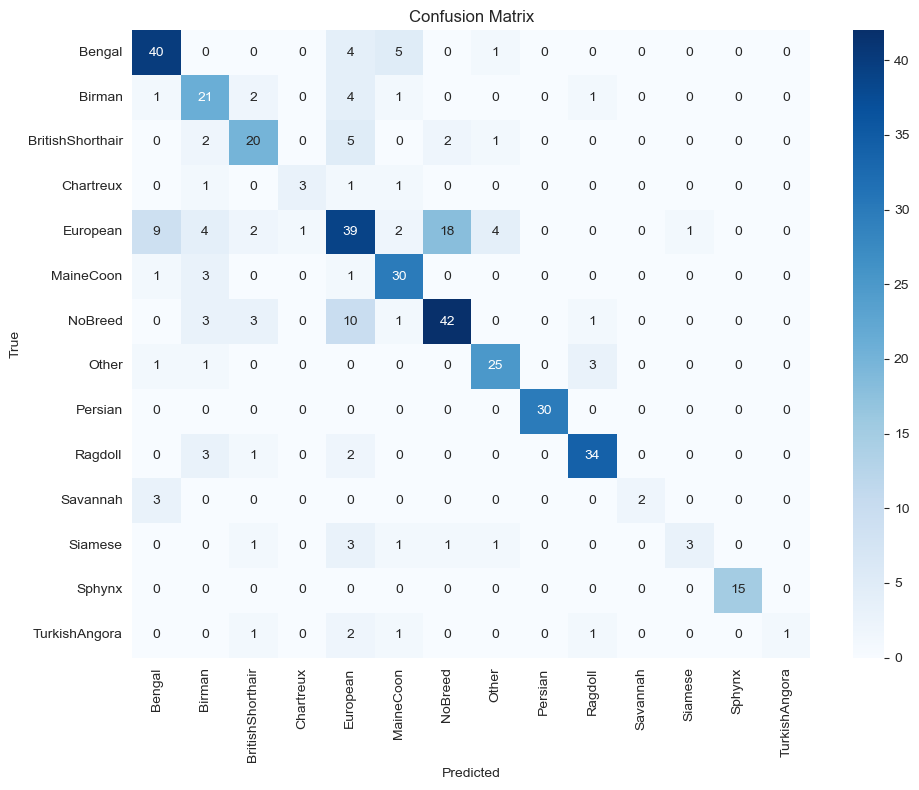

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(best_model, test_df):
    """
    Test the trained model on a new test dataset.
    
    Parameters:
    best_model: trained Keras model
    test_df: pandas DataFrame containing test data
    
    Returns:
    dict containing test accuracy, predictions, and evaluation metrics
    """
    # Prepare test data
    race_columns = [col for col in test_df.columns if col.startswith('Race_')]
    X_test = test_df.drop(columns=race_columns)
    y_test = test_df[race_columns]
    
    # Scale features using the same approach as training
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Make predictions
    y_pred_proba = best_model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test.values, axis=1)
    
    # Calculate accuracy
    test_accuracy = np.mean(y_pred == y_test_classes)
    
    # Generate classification report
    class_names = [col.replace('Race_', '') for col in race_columns]
    report = classification_report(y_test_classes, y_pred, target_names=class_names)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    
    # Calculate per-class metrics
    per_class_metrics = {}
    for i, class_name in enumerate(class_names):
        true_class = (y_test_classes == i)
        pred_class = (y_pred == i)
        
        true_positives = np.sum(true_class & pred_class)
        false_positives = np.sum(~true_class & pred_class)
        false_negatives = np.sum(true_class & ~pred_class)
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        per_class_metrics[class_name] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    
    return {
        'test_accuracy': test_accuracy,
        'classification_report': report,
        'confusion_matrix': cm,
        'per_class_metrics': per_class_metrics,
        'predictions': y_pred,
        'prediction_probabilities': y_pred_proba
    }

# Example usage
def evaluate_test_results(test_df, best_model):
    """
    Evaluate and print test results in a readable format.
    """
    results = test_model(best_model, test_df)
    
    print("\n=== Model Evaluation on Test Data ===")
    print(f"\nOverall Test Accuracy: {results['test_accuracy']:.4f}")
    
    print("\nClassification Report:")
    print(results['classification_report'])
    
    print("\nPer-Class Metrics:")
    for class_name, metrics in results['per_class_metrics'].items():
        print(f"\n{class_name}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")
    
    return results

# To use the testing script:
results = evaluate_test_results(test_df, best_model)